<figure>
  <IMG SRC="gfx/Logo_norsk_pos.png" WIDTH=100 ALIGN="right">
</figure>

# Finite difference method for one-dimensional problems
*Roberto Di Remigio*, *Luca Frediani*

0.504731458403
0.234586219453


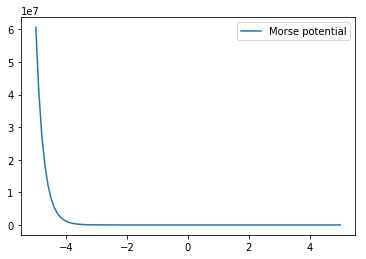

In [23]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
# make sure we see it on this notebook
%matplotlib inline


def free_particle(x):
    """
    """
    return 0.0


class MorseOscillator(object):
    def __init__(self, D_eq, x_eq, k_eq):
        self.De = D_eq
        self.xe = x_eq
        self.ke = k_eq
        self.a  = np.sqrt(self.ke / (2.0*self.De))

    def __call__(self, x):
        return (self.De * (1 - np.exp(-self.a * (x)))**2)

    
class HarmonicOscillator(object):
    def __init__(self, mass, frequency):
        self.M     = mass
        self.omega = frequency
        self.k     = self.M * self.omega**2

    def __call__(self, x):
        return (1.0/2.0 * self.M * self.omega**2 * x**2)

    
def quadratic(x):
    return (1./2. * x**2)    

def quartic(x):
    return (1./24. * x**4)


def finite_difference_Hamiltonian(grid, potential):
    """ Return finite difference Hamiltonian using a centered, three-point stencil
    grid -- equispaced grid
    potential -- potential function in the Hamiltonian
    """
    N = grid.size
    hamiltonian = np.zeros((N, N))
    for i in range(N):
        hamiltonian[i, i] = 1.0 / (h**2) + potential(grid[i])
        for j in range(N):
            if (j == i+1) or (j == i-1):
                hamiltonian[i, j] = -1.0/(2.0 * h**2)
    return hamiltonian

# Discretization set up
L = 10.0
N = 100
grid = np.linspace(-L/2., L/2., N)

harmonic_oscillator = HarmonicOscillator(1.0, 1.0)
H_harm = finite_difference_Hamiltonian(grid, harmonic_oscillator)
E_harm, psi_harm = LA.eig(H_harm)
print(E_harm[0])
#plt.plot(grid, psi_harm[:, 0]**2, label='quadratic')
#plt.plot(grid, psi_harm[:, 0]**2)

H_cubic = finite_difference_Hamiltonian(grid, quartic)
E_cube, psi_cube = LA.eig(H_cubic)
print(E_cube[0])
#plt.plot(grid, psi_cube[:, 0]**2,label='quartic')
#plt.plot(grid, psi_cube[:, 0]**2)

H_Morse = finite_difference_Hamiltonian(grid, MorseOscillator(1./8., 2., 1.))
plt.plot(grid, MorseOscillator(1./8., 2., 1.)(x), label='Morse potential')

plt.legend()